# Project: Investigate TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**Selected Database**: TMDb Movie Dataset<br>

**Dataset detail** : This dataset contains information about 10K movies collected from the movie database(TMDb). It includes movie infomation including user ratings and revenue detail.

**Question like to answer** <br>
we will divide question into two parts first part(1 to 4) we will answer general questions about this data set
and in second part(5 to 7) we would answer questions in relation with profitable movies where we assume profitable movie = (profit > 40000 USD)
1. Highest and lowest profit making movie all time.
2. Highest and lowest budget movie all time.
3. Popular movie runtime of all time.
4. Movie Budget trend over year
5. Average movie runtime for profitable movies.
6. Average budget for profitable movies.
7. Most common generes for profitable movies.

In [202]:
# Import statements for all of the packages that I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline


In [203]:
# Common function and constants that I am using

#function to drop column from dataset and display info to verify
def drop(dataset, columns, showinfo = True):
    dataset.drop(columns, axis = 1, inplace = True)
    if showinfo:
        dataset.info()

#function calculates high and low value of a column of given dataset        
def calculate_high_low_value(dataset, column):
    
    #calculate high value
    high = df.loc[df[column].idxmax()]
    #calculate low value
    low = df.loc[df[column].idxmin()]  
    #concat and return to display properly
    return pd.concat([high, low], axis = 1)

#function to set graph labels      
def set_graph_labels(ax, x_label, y_label, title):
    ax.set_xlabel(x_label, fontsize = 12)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.set_title(title, fontsize = 15);

#define constants

#size in inches of graph we are creating
FIG_SIZE = (12,8)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [204]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [205]:
#Get column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Observation 
**Total no of rows** : 10866<br>
**Totoal no of columns**: 21<br>
**Columns with null values**: ["cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies"]<br>

looking at data seems like some of columns(["homepage", "tagline", "keywords", "production_companies"]) have lots of null values, so we will be removing these columns.

Also for the questions we have to answer we don't need all column like ["vote_count", "vote_average"] etc. So we will be removing those too and only keep columns that we need for our data analysis.

### Data Cleaning 
**We will be taking following steps for data cleaning**
1. Remove columns that have lots of null values.
2. Remove columns that we do not needed for our data analysis
3. Review and remove duplicate rows.
4. Handle null values

#### Remove columns that have lots of null values.

In [206]:
drop(df, ['homepage', 'tagline', 'keywords', 'production_companies'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


##### Remove columns that we do not needed for our data analysis
for our analysis we don't need certain fields, so we are removing them 

In [207]:
drop(df, ['id', 'imdb_id', 'popularity', 'cast', 'director', 'overview', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(3)
memory usage: 594.3+ KB


##### Review and remove duplicate rows.
In this section we will remove duplicate rows if needed.
Lets review duplicate rows

In [208]:
df.drop_duplicates(inplace = True)
#Verify data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(3)
memory usage: 679.1+ KB


Looks like one row was duplicate and we removed it

##### Handle null values
In this section we will review columns with null values and will handle accordingly

In [209]:
df.describe()

,budget,revenue,runtime,release_year
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


Looks like there are lots of 0 values in budget and revenue field, since answers we are looking for are in relation with profit (revenue - budget), we need to remove 0 values in budget and revenue columns. For that we are first going to replace 0 values to nan then we remove all nan values in our dataset.

In [210]:
cols = ["budget", "revenue"]
df[cols] = df[cols].replace(0, np.nan)
#lets take a look at data again
df.describe()

,budget,revenue,runtime,release_year
count,5.169000e+03,4.849000e+03,10865.000000,10865.000000
mean,3.073958e+07,8.923886e+07,102.071790,2001.321859
std,3.890441e+07,1.620801e+08,31.382701,12.813260
min,1.000000e+00,2.000000e+00,0.000000,1960.000000
25%,6.000000e+06,7.732325e+06,90.000000,1995.000000
50%,1.700000e+07,3.185308e+07,99.000000,2006.000000
75%,4.000000e+07,9.996575e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [211]:
#Removing all the row which has NaN value in our dataset 
df.dropna(inplace = True)
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


Since now data looks clean we are going to do some final mods before we start our data analysis

#### Verify and update data types as required
lets review field data types

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 240.9+ KB


looks like release_date column is object type lets first change it to date type

In [213]:
df["release_date"] =  pd.to_datetime(df['release_date'])

budget and revenue columns are float type we don't need float type lets change it to int

In [214]:
df["budget"] = df["budget"].astype('int64')
df["revenue"] = df["revenue"].astype('int64')

verify all data types are converted properly

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 240.9+ KB


lets review data 

In [216]:
df.head(3) 

,budget,revenue,original_title,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


All types looks good , lets add profit column 

In [217]:
df.insert(2, "profit", df.revenue - df.budget)

Verify if profit column got added properly

In [218]:
df.head(3) 

,budget,revenue,profit,original_title,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Highest and lowest profit making movie all time

In [219]:
calculate_high_low_value(df, 'profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


So our data shows that highest profit making movie is "Avatar" and lowest profit making is "The Warrior's Way".

### Highest and lowest budget movie all time.

In [220]:
calculate_high_low_value(df, 'budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


So our data shows that highest budget movie is "The Warrior's Way" and lowest budget movie is "Lost & Found".

### Average runtime movie of all movies

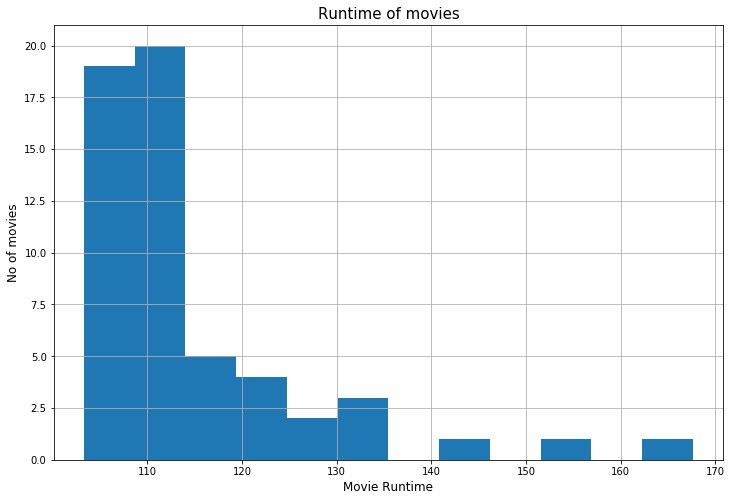

In [221]:
#Since we are looking for year wise populer movie time, doing group by release year will club data year wise
#then we will take mean of runtime to plot on graph
run_time_trend = df.groupby('release_year')['runtime'].mean()
ax = run_time_trend.hist(figsize=FIG_SIZE, bins="auto")
set_graph_labels(ax, "Movie Runtime", "No of movies", "Runtime of movies")
plt.show()

Looking at above graph seems like populare movie runtime interval was between 106 - 113 mins. Lets take a more deeper look by using describe method.

In [222]:
run_time_trend.describe()

count     56.000000
mean     114.847356
std       12.203451
min      103.304348
25%      107.932782
50%      109.718896
75%      118.346154
max      167.600000
Name: runtime, dtype: float64

Looking at above calculation we can say that 
1. 25% of movies runtime was less then 107 mins
2. 50% of movies runtime was less then 109 mins
2. 75% of movies runtime was less then 118 mins
Here IQR for movie runtime will be 107 to 118 mins.
Also looking at it looks like distribution is right skewed.

### Budget trend over year

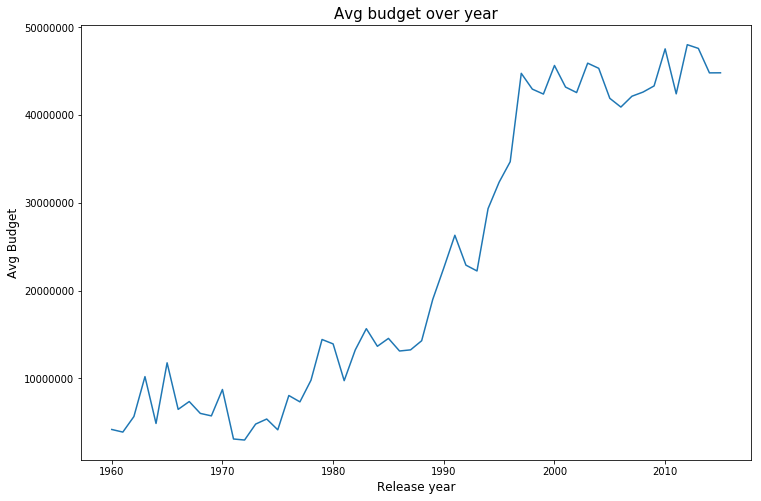

In [223]:
#Since we are looking for year wise populer movie time, doing group by release year will club data year wise
#then we will take mean of runtime to plot on graph
budget_trend = df.groupby('release_year')['budget'].mean()
#budget_trend = budget_trend.astype('int64') 
ax = budget_trend.plot(figsize=FIG_SIZE)
set_graph_labels(ax, "Release year", "Avg Budget", "Avg budget over year")
plt.ticklabel_format(style = 'plain')
plt.show()

In [224]:
#checkout lowest and highest movie budget year
print("Max budget year:",budget_trend.idxmax())
print("Min budget year:",budget_trend.idxmin())

Max budget year: 2012
Min budget year: 1972


Looking at graph we can say following things
1. there was sharp increase in budget in year range 1992 to 1998.
2. Year where movie budget was minimum was 1972
2. Year where movie budget was highest was 2012

### Average movie runtime for profitable movies
Our our analysis we will call a movie profitable if it had profit atleast > 40000 <br>
#### Filter dataset where profit is > 40000

In [225]:
profitable_ds = df.query("profit > 40000")

In [226]:
print("Average movie runtime: {}".format(profitable_ds["runtime"].mean()))

Average movie runtime: 110.22600507062658


### Average budget for profitable movies

In [227]:
print("Average budget amount: {}".format(profitable_ds["budget"].mean()))

Average budget amount: 40511115.41035856


### Most common generes for profitable movies

In [228]:
all_genres = pd.Series("|".join(profitable_ds["genres"]).split('|')).value_counts()
#lets see its values
all_genres.head()

Drama        1168
Comedy       1001
Thriller      831
Action        782
Adventure     573
dtype: int64

Plot graph

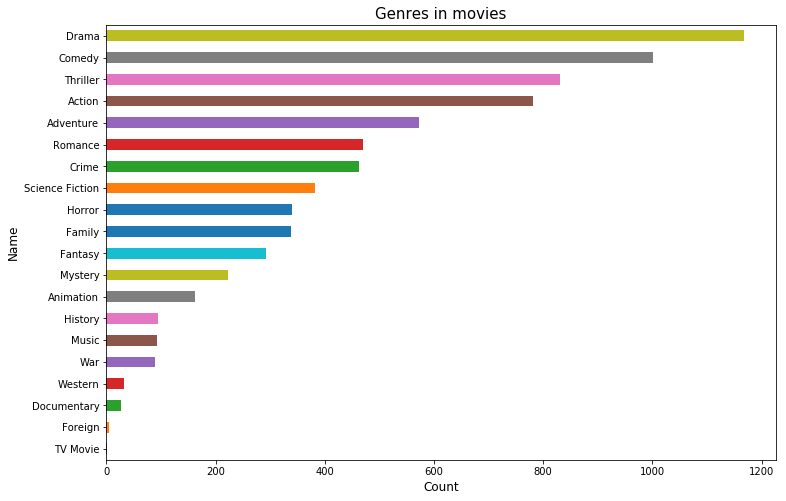

In [229]:
#Lets sort in assending order so top genres shows on top
all_genres.sort_values(ascending = True, inplace = True)
ax = all_genres.plot.barh(figsize=FIG_SIZE)
set_graph_labels(ax, "Count", "Name", "Genres in movies")
plt.show()

Looking at result top 5 genres are Drama, Comedy, Thriller, Action, Adventure. <br>
Drama genre is the highest(1167) in profitable movies.

<a id='conclusions'></a>
## Conclusions <br>
### General findings <br>
1. Populare movie runtime interval is between 106 - 113.<br>
2. Highest profit making movie is Avatar.<br>
3. Highest budget movie is The Warrior's Way although it has loss.<br>

### For profitable movies following are helpful <br>
1. Budget amount 40524278 are more. <br>
2. Movie runtime around 110 mins. <br>
3. Genres Drama, Comedy, Thriller, Action, Adventure  <br>

### Limitations
1. I assumed amounts are in USD.
2. I assumed that 0 amount in budget and revenue are missing also that in budget/revenue there are very low values which might not be correct.  
3. Conclusion regarding profitable movies are just indicators it does not gurantee profitable movies.
4. Did not consider many columns in data set like director, cast etc
5. There could also be Other external factors like ticket price, movie promotion, month(time of holidays) etc we did not consider those.
6. Did't used budget and revenue adjusted values.

### Resources Used
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html<br>
https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan<br>
https://www.xenonstack.com/blog/data-science/preparation-wrangling-machine-learning-deep/<br>
http://pbpython.com/pandas_dtypes.html<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html<br>
https://matplotlib.org/tutorials/introductory/sample_plots.html<br>
https://www.dataquest.io/blog/adding-axis-labels-to-plots-with-pandas-and-matplotlib/<br>
https://realpython.com/python-string-split-concatenate-join/<br>